In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
os.chdir('/work/Labs/lab4')
data = pd.read_csv('data.csv')

In [ ]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [ ]:
# dropping missing in embarked option

data = data.dropna(axis=0, how="any", thresh=None, subset=['embarked'], inplace=False)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.5000,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",0,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.5000,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",1,27.0000,0,0,2670,7.2250,NaN,C


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
temp = ohe.fit_transform(data[['embarked']])
temp = temp.toarray()
print(temp)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
data.drop(['embarked'], axis=1, inplace=True)
data[['C', 'Q', 'S']] = temp
data

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,C,Q,S
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,0.0,0.0,1.0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,0.0,0.0,1.0
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,0.0,0.0,1.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,0.0,0.0,1.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.5000,1,0,2665,14.4542,NaN,1.0,0.0,0.0
1305,3,0,"Zabour, Miss. Thamine",0,NaN,1,0,2665,14.4542,NaN,1.0,0.0,0.0
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.5000,0,0,2656,7.2250,NaN,1.0,0.0,0.0
1307,3,0,"Zakarian, Mr. Ortin",1,27.0000,0,0,2670,7.2250,NaN,1.0,0.0,0.0


In [ ]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')
temp = si.fit_transform(data[['age']])
temp

array([[29.    ],
       [ 0.9167],
       [ 2.    ],
       ...,
       [26.5   ],
       [27.    ],
       [29.    ]])

In [ ]:
data['age'] = temp

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1307 non-null   int64  
 1   survived  1307 non-null   int64  
 2   name      1307 non-null   object 
 3   sex       1307 non-null   int64  
 4   age       1307 non-null   float64
 5   sibsp     1307 non-null   int64  
 6   parch     1307 non-null   int64  
 7   ticket    1307 non-null   object 
 8   fare      1306 non-null   float64
 9   cabin     293 non-null    object 
 10  C         1307 non-null   float64
 11  Q         1307 non-null   float64
 12  S         1307 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 143.0+ KB


<AxesSubplot:>

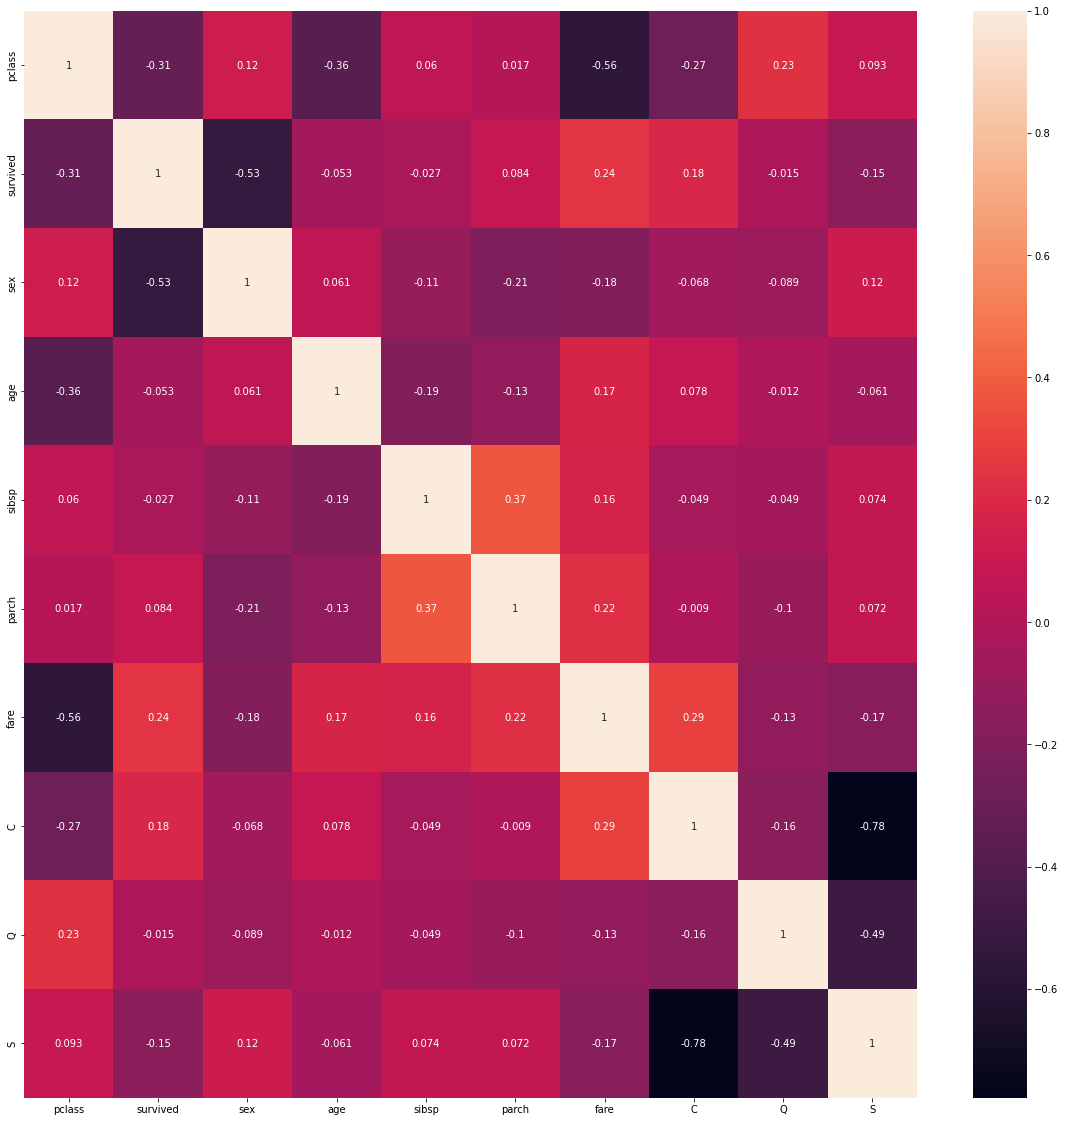

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

In [ ]:
data_temp = data.dropna(subset=['cabin'], inplace=False)
data_temp

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,C,Q,S
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,0.0,0.0,1.0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,0.0,0.0,1.0
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,0.0,0.0,1.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,0.0,0.0,1.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,3,1,"Sandstrom, Miss. Marguerite Rut",0,4.0000,1,1,PP 9549,16.7000,G6,0.0,0.0,1.0
1217,3,0,"Soholt, Mr. Peter Andreas Lauritz Andersen",1,19.0000,0,0,348124,7.6500,F G73,0.0,0.0,1.0
1230,3,0,"Strom, Miss. Telma Matilda",0,2.0000,0,1,347054,10.4625,G6,0.0,0.0,1.0
1231,3,0,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",0,29.0000,1,1,347054,10.4625,G6,0.0,0.0,1.0


In [ ]:
x = data.drop(['survived', 'name', 'ticket', 'cabin'], axis=1).values
y = data['survived'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
x_tra, x_tes, y_tra, y_tes = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
gnb = GaussianNB()
gnb.fit(x_tra, y_tra)

GaussianNB()

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = gnb.predict(x_tra)
print(f1_score(y_true=y_tra, y_pred=y_pred))

0.7035330261136712


In [ ]:
print(accuracy_score(y_tra, y_pred))

0.7888402625820569


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_tra, y_pred))

[[492  76]
 [117 229]]


In [ ]:
y_pred = gnb.predict(x_tes)
print(f1_score(y_true=y_tra, y_pred=y_pred))
print(accuracy_score(y_tra, y_pred))
print(confusion_matrix(y_tra, y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a5ba1956-2aa0-49ed-9952-f1c7a30328f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>